In [20]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [21]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [22]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  n


In [23]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [24]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.3880793896585122, 0.5209445447717123],
 'diameter': 50.20126167990949,
 'confidence': 0.9939247369766235,
 'timestamp': 588877.504448,
 'sphere': {'center': [2.2289876043794052,
   1.3573304127681316,
   46.425443630336964],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [109.45073581331347, 104.2118291802308],
  'axes': [151.43100788489102, 151.43100788489102],
  'angle': 0.0},
 'circle_3d': {'center': [-3.6000512897942345,
   -0.05285538650302124,
   37.938177781917645],
  'normal': [-0.5608995291113249, -0.1356951918027646, -0.816687537044802],
  'radius': 2.9620623513722064},
 'diameter_3d': 5.924124702744413,
 'ellipse': {'center': [74.51124281443434, 91.97864740383125],
  'axes': [41.38780609666161, 50.20126167990949],
  'angle': 13.597514277532213},
 'location': [74.51124281443434, 91.97864740383125],
 'model_confidence': 1.0,
 'theta': 1.7069114375221175,
 'phi': -2.172606961

Text(0.5, 0, 'Pupil timestamp (s)')

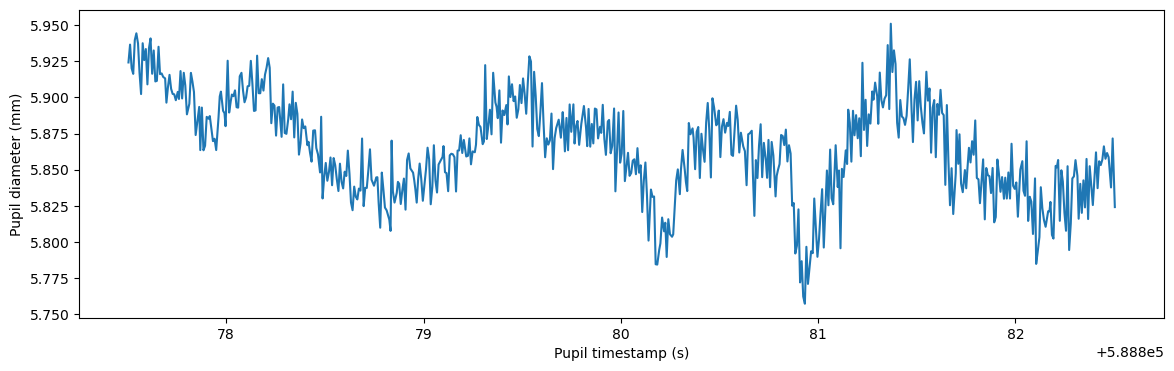

In [25]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')